In [6]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from pylab import pcolor, colorbar, plot

In [14]:
X = pd.read_csv('breast_input.csv')
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [15]:
y = pd.read_csv('breast_output.csv')
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [17]:
normalizer = MinMaxScaler(feature_range=(0,1))

X_p = normalizer.fit_transform(X.to_numpy())
y_p = y.to_numpy()

In [23]:
size = int(round(np.sqrt(5*np.sqrt(X.shape[0]))))
size

11

In [112]:
som = MiniSom(x=size, y=size, input_len=X.shape[1], sigma=2.5, learning_rate=0.2, random_seed=42)
som.random_weights_init(X_p)
som.train_random(data=X_p, num_iteration=1000)

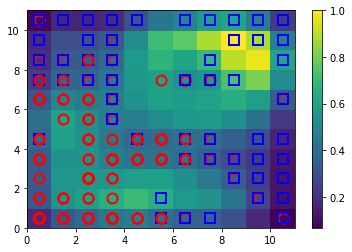

In [113]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'b']

for i, x in enumerate(X_p):
    w = som.winner(x)
    
    plot(w[0] + 0.5, w[1] + 0.5, markers[y_p[i][0]], markerfacecolor= 'None', markersize= 10, markeredgecolor=colors[y_p[i][0]],
        markeredgewidth=2)